# Imports

In [1]:
import sys 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping


# EDA

In [2]:
data = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
data.shape

(2075259, 7)

In [6]:
data.dtypes


Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2049280.0,1.091615,1.057294,0.076,0.308,0.602,1.528,11.122
Global_reactive_power,2049280.0,0.123714,0.112722,0.000,0.048,0.100,0.194,1.390
Voltage,2049280.0,240.839858,3.239987,223.200,238.990,241.010,242.890,254.150
Global_intensity,2049280.0,4.627759,4.444396,0.200,1.400,2.600,6.400,48.400
Sub_metering_1,2049280.0,1.121923,6.153031,0.000,0.000,0.000,0.000,88.000
Sub_metering_2,2049280.0,1.298520,5.822026,0.000,0.000,0.000,1.000,80.000
Sub_metering_3,2049280.0,6.458447,8.437154,0.000,0.000,1.000,17.000,31.000


In [8]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
data.isnull().any()


Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
Sub_metering_1           True
Sub_metering_2           True
Sub_metering_3           True
dtype: bool

In [10]:
data.isnull().sum()


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
# filling nan with mean in any columns
for j in range(0,7):        
        data.iloc[:,j]=data.iloc[:,j].fillna(data.iloc[:,j].mean())

In [12]:
data.isnull().sum()


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

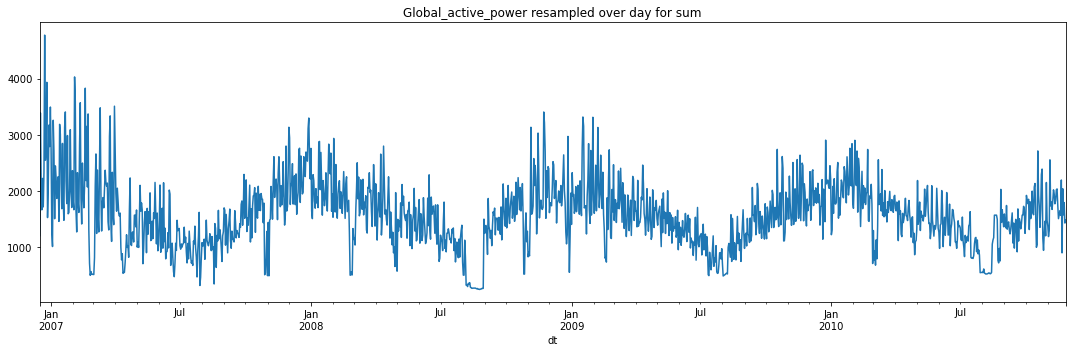

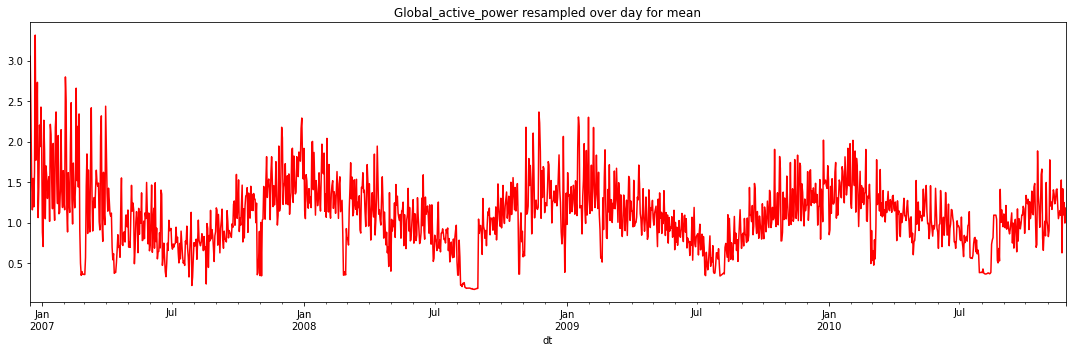

In [13]:
plt.figure(figsize=(15, 5))
data.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()   
plt.figure(figsize=(15, 5))
data.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

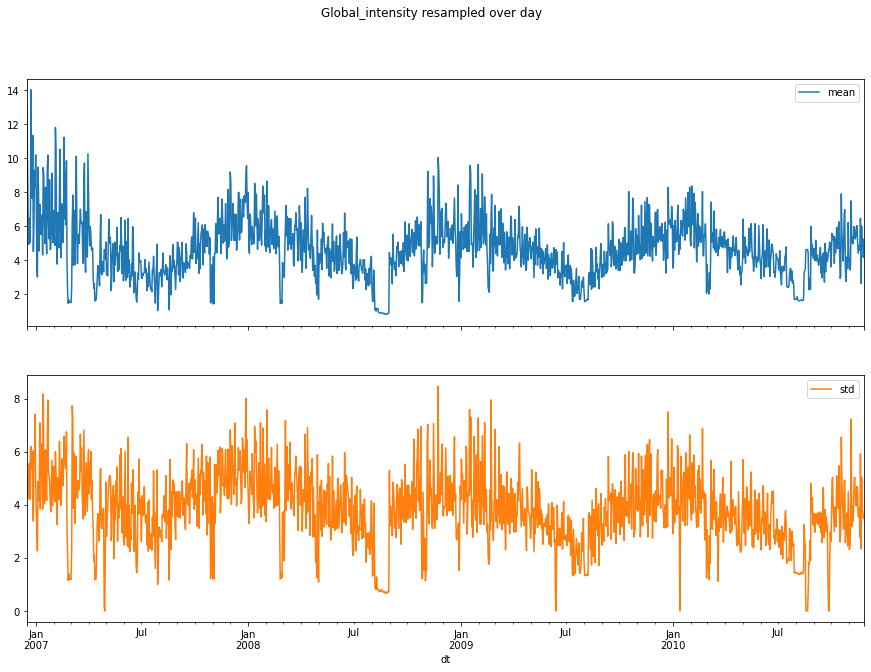

In [14]:
r = data.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day', figsize=(15, 10))
plt.show()

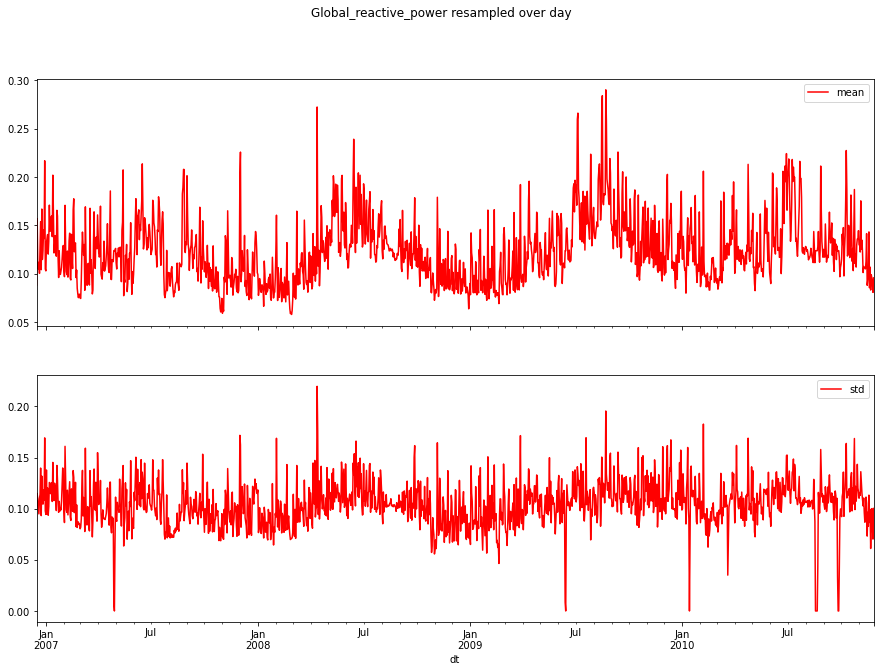

In [15]:
r2 = data.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red', figsize=(15, 10))
plt.show()

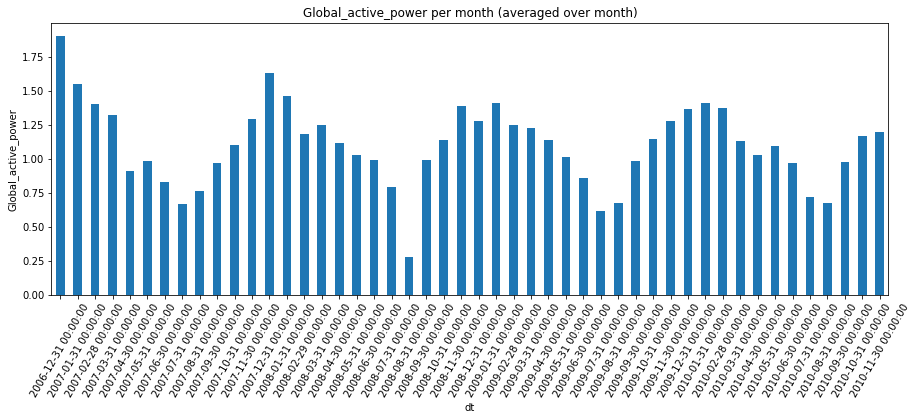

In [16]:
# Sum of 'Global_active_power' resampled over month
plt.figure(figsize=(15,5))
data['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

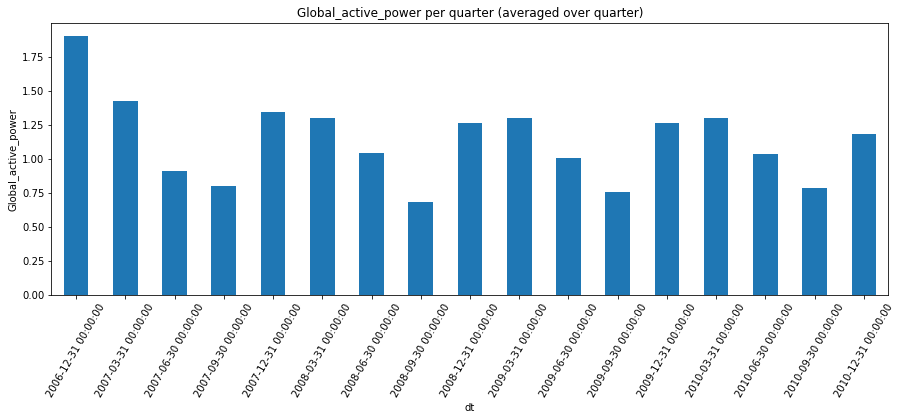

In [17]:
plt.figure(figsize=(15,5))
data['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

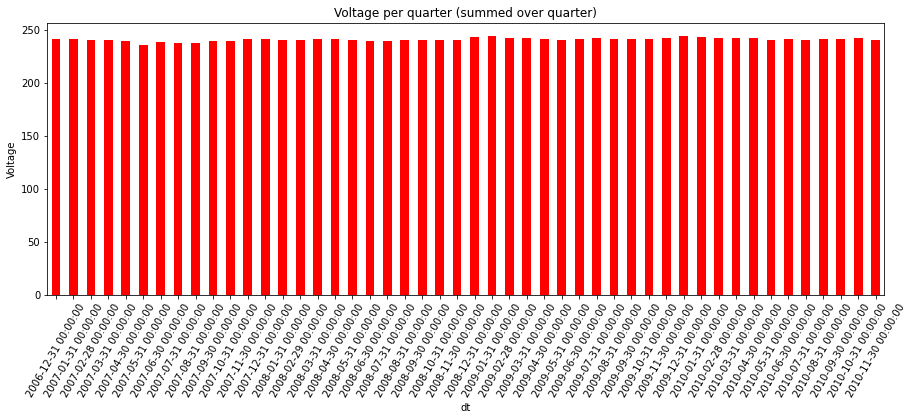

In [18]:
plt.figure(figsize=(15,5))
data['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()# Visulization show voltage is pretty consistant

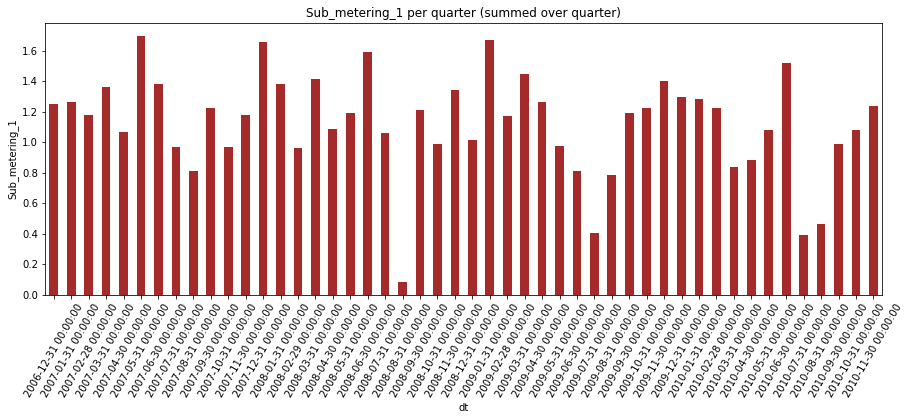

In [19]:
plt.figure(figsize=(15,5))
data['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

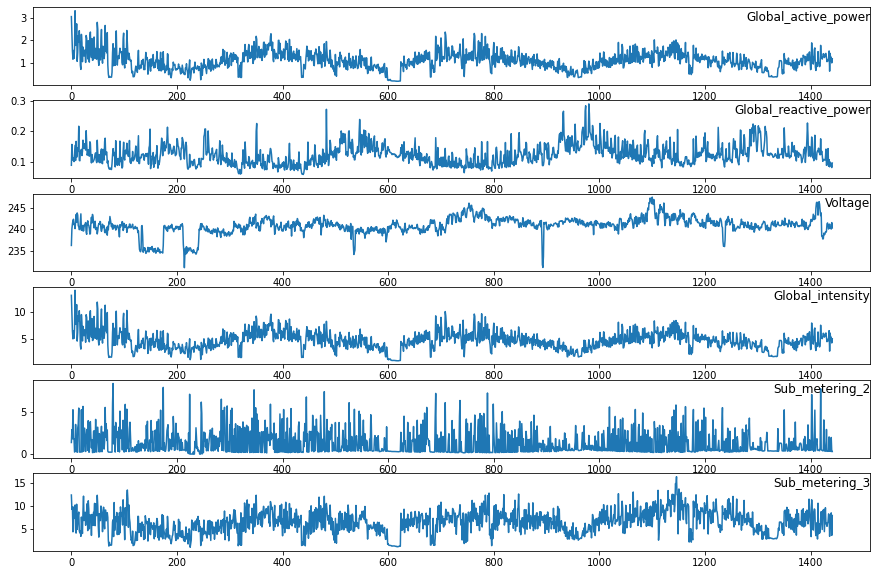

In [20]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
values = data.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(data.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

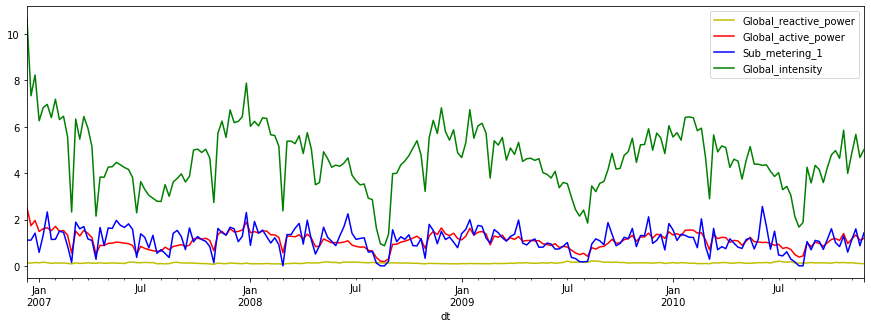

In [21]:
## resampling over week and computing mean
plt.figure(figsize=(15,5))
data.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
data.Global_active_power.resample('W').mean().plot(color='r', legend=True)
data.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
data.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

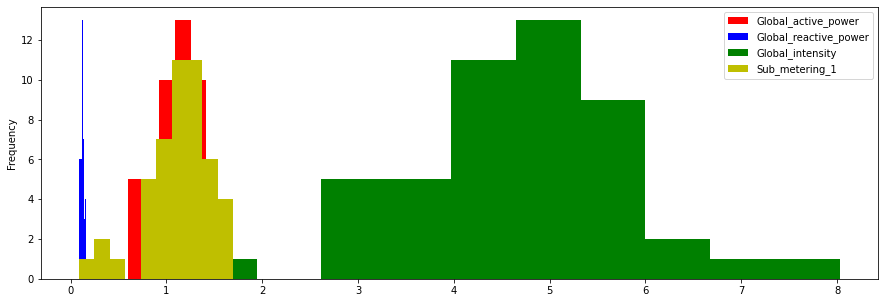

In [22]:
# Below I show hist plot of the mean of different feature resampled over month 
plt.figure(figsize=(15,5))
data.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
data.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
data.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
data.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

/var/folders/b8/bmq4rlpn1d32yd4c88zdz0600000gp/T/ipykernel_95730/1682584971.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corrMatrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

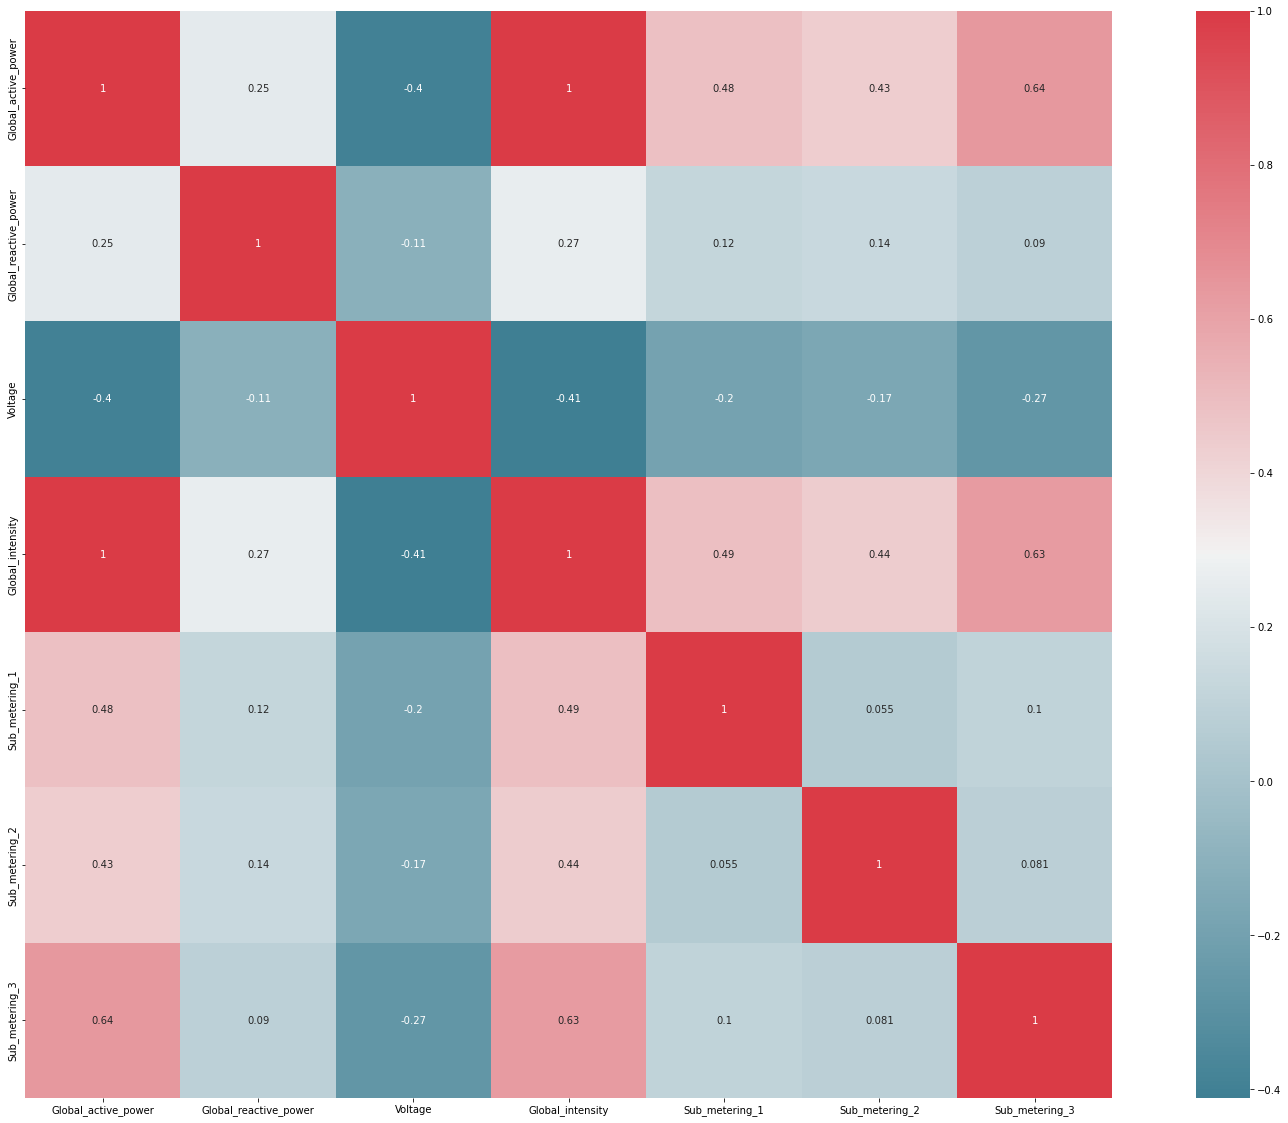

In [23]:
corrMatrix = data.corr()
f, ax = plt.subplots(figsize=(30, 20))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corrMatrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

We can observe that Global_intensity and Global_active_power are highly correlated. while voltage is less correlated.

# LSTM Model 

In [24]:
# framing the supervised learning problem as predicting the Global_active_power 
# at the current time (t) given the Global_active_power measurement and other features at the prior time step.

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    #print(cols)
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    print(agg.head())
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

In [25]:
## resampling of data over hour, resampling by hour instead minutes to save some computation
df_resample = data.resample('h').mean() 
df_resample.shape

(34589, 7)

In [37]:
values = df_resample.values 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  \
0        NaN  0.636816  0.295738  0.337945  0.631157      0.0  0.011366   
1   0.782418  0.545045  0.103358  0.335501  0.541487      0.0  0.144652   
2   0.782676  0.509006  0.110073  0.283802  0.502152      0.0  0.030869   
3   0.774169  0.488550  0.096987  0.315987  0.481110      0.0  0.000000   
4   0.778809  0.455597  0.099010  0.434417  0.449904      0.0  0.008973   

    var7(t)  
0  0.782418  
1  0.782676  
2  0.774169  
3  0.778809  
4  0.798917  
<bound method NDFrame.head of        v

In [27]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24 *2 #  year data for training
train = values[:n_train_time, :]
test = values[n_train_time:, :] #  year data for testing
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(17520, 1, 7) (17520,) (17068, 1, 7) (17068,)


In [28]:
def simple_LSTM():
    model = Sequential()
    model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [29]:
def two_LSTM():
    model = Sequential()#Adding another LSTM layer
    model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(70))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [30]:
def three_LSTM():
    model = Sequential()#having more dense layers
    model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(70))
    model.add(Dense(50))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [31]:
def four_LSTM():
    model = Sequential()#More Nodes
    model.add(LSTM(500, input_shape=(train_X.shape[1], train_X.shape[2]),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(150))
    model.add(Dense(100))
    model.add(Dropout(0.3))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [32]:
models = list()
models.append(simple_LSTM())
models.append(two_LSTM())
models.append(three_LSTM())
models.append(four_LSTM())

2022-09-19 18:00:20.886995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/400
274/274 - 3s - loss: 0.0152 - val_loss: 0.0099 - 3s/epoch - 9ms/step
Epoch 2/400
274/274 - 1s - loss: 0.0107 - val_loss: 0.0085 - 639ms/epoch - 2ms/step
Epoch 3/400
274/274 - 1s - loss: 0.0102 - val_loss: 0.0085 - 639ms/epoch - 2ms/step
Epoch 4/400
274/274 - 1s - loss: 0.0101 - val_loss: 0.0084 - 634ms/epoch - 2ms/step
Epoch 5/400
274/274 - 1s - loss: 0.0101 - val_loss: 0.0084 - 669ms/epoch - 2ms/step
Epoch 6/400
274/274 - 1s - loss: 0.0099 - val_loss: 0.0084 - 668ms/epoch - 2ms/step
Epoch 7/400
274/274 - 1s - loss: 0.0100 - val_loss: 0.0084 - 640ms/epoch - 2ms/step
Epoch 8/400
274/274 - 1s - loss: 0.0099 - val_loss: 0.0085 - 633ms/epoch - 2ms/step
Epoch 9/400
274/274 - 1s - loss: 0.0099 - val_loss: 0.0083 - 628ms/epoch - 2ms/step
Epoch 10/400
274/274 - 1s - loss: 0.0099 - val_loss: 0.0083 - 642ms/epoch - 2ms/step
Epoch 11/400
274/274 - 1s - loss: 0.0099 - val_loss: 0.0084 - 638ms/epoch - 2ms/step
Epoch 12/400
274/274 - 1s - loss: 0.0099 - val_loss: 0.0084 - 634ms/epoch - 2

Epoch 98/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 702ms/epoch - 3ms/step
Epoch 99/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 703ms/epoch - 3ms/step
Epoch 100/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 699ms/epoch - 3ms/step
Epoch 101/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 698ms/epoch - 3ms/step
Epoch 102/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 699ms/epoch - 3ms/step
Epoch 103/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 705ms/epoch - 3ms/step
Epoch 104/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 697ms/epoch - 3ms/step
Epoch 105/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 700ms/epoch - 3ms/step
Epoch 106/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 698ms/epoch - 3ms/step
Epoch 107/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 707ms/epoch - 3ms/step
Epoch 108/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0078 - 698ms/epoch - 3ms/step
Epoch 109/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.

Epoch 194/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 708ms/epoch - 3ms/step
Epoch 195/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 659ms/epoch - 2ms/step
Epoch 196/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 659ms/epoch - 2ms/step
Epoch 197/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 662ms/epoch - 2ms/step
Epoch 198/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 659ms/epoch - 2ms/step
Epoch 199/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 660ms/epoch - 2ms/step
Epoch 200/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 660ms/epoch - 2ms/step
Epoch 201/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 662ms/epoch - 2ms/step
Epoch 202/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 662ms/epoch - 2ms/step
Epoch 203/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 661ms/epoch - 2ms/step
Epoch 204/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 659ms/epoch - 2ms/step
Epoch 205/400
274/274 - 1s - loss: 0.0095 - val_loss: 

Epoch 291/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 607ms/epoch - 2ms/step
Epoch 292/400
274/274 - 2s - loss: 0.0094 - val_loss: 0.0077 - 2s/epoch - 8ms/step
Epoch 293/400
274/274 - 3s - loss: 0.0094 - val_loss: 0.0077 - 3s/epoch - 11ms/step
Epoch 294/400
274/274 - 6s - loss: 0.0094 - val_loss: 0.0077 - 6s/epoch - 24ms/step
Epoch 295/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0077 - 844ms/epoch - 3ms/step
Epoch 296/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0077 - 770ms/epoch - 3ms/step
Epoch 297/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0077 - 609ms/epoch - 2ms/step
Epoch 298/400
274/274 - 3s - loss: 0.0094 - val_loss: 0.0077 - 3s/epoch - 10ms/step
Epoch 299/400
274/274 - 3s - loss: 0.0095 - val_loss: 0.0077 - 3s/epoch - 11ms/step
Epoch 300/400
274/274 - 6s - loss: 0.0094 - val_loss: 0.0077 - 6s/epoch - 21ms/step
Epoch 301/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0077 - 645ms/epoch - 2ms/step
Epoch 302/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0077 - 730m

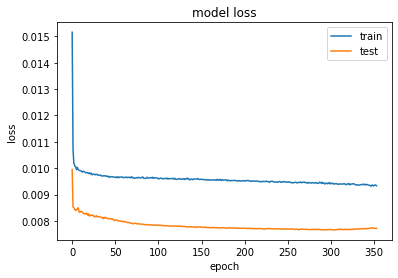

534/534 [==============================] - 6s 762us/step
Test RMSE: 0.565
Epoch 1/400
274/274 - 17s - loss: 0.0157 - val_loss: 0.0095 - 17s/epoch - 61ms/step
Epoch 2/400
274/274 - 1s - loss: 0.0106 - val_loss: 0.0091 - 1s/epoch - 4ms/step
Epoch 3/400
274/274 - 1s - loss: 0.0103 - val_loss: 0.0090 - 1s/epoch - 4ms/step
Epoch 4/400
274/274 - 3s - loss: 0.0101 - val_loss: 0.0089 - 3s/epoch - 12ms/step
Epoch 5/400
274/274 - 5s - loss: 0.0102 - val_loss: 0.0087 - 5s/epoch - 18ms/step
Epoch 6/400
274/274 - 5s - loss: 0.0101 - val_loss: 0.0088 - 5s/epoch - 17ms/step
Epoch 7/400
274/274 - 8s - loss: 0.0101 - val_loss: 0.0086 - 8s/epoch - 29ms/step
Epoch 8/400
274/274 - 1s - loss: 0.0101 - val_loss: 0.0085 - 1s/epoch - 4ms/step
Epoch 9/400
274/274 - 1s - loss: 0.0100 - val_loss: 0.0085 - 953ms/epoch - 3ms/step
Epoch 10/400
274/274 - 4s - loss: 0.0100 - val_loss: 0.0084 - 4s/epoch - 14ms/step
Epoch 11/400
274/274 - 8s - loss: 0.0100 - val_loss: 0.0084 - 8s/epoch - 30ms/step
Epoch 12/400
274/274 

Epoch 100/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0081 - 1s/epoch - 4ms/step
Epoch 101/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0080 - 1s/epoch - 4ms/step
Epoch 102/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0081 - 1s/epoch - 4ms/step
Epoch 103/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0081 - 1s/epoch - 4ms/step
Epoch 104/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0081 - 1s/epoch - 4ms/step
Epoch 105/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0081 - 1s/epoch - 5ms/step
Epoch 106/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0080 - 1s/epoch - 4ms/step
Epoch 107/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0080 - 1s/epoch - 4ms/step
Epoch 108/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0080 - 1s/epoch - 4ms/step
Epoch 109/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0080 - 1s/epoch - 5ms/step
Epoch 110/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0081 - 1s/epoch - 4ms/step
Epoch 111/400
274/274 - 1s - loss: 0.0096 - val_loss: 0.0080 - 1s/epoch - 5ms/step
Epoc

Epoch 198/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0078 - 1s/epoch - 4ms/step
Epoch 199/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0078 - 1s/epoch - 4ms/step
Epoch 200/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0078 - 1s/epoch - 4ms/step
Epoch 201/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0078 - 1s/epoch - 4ms/step
Epoch 202/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0078 - 1s/epoch - 4ms/step
Epoch 203/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 1s/epoch - 5ms/step
Epoch 204/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0078 - 1s/epoch - 4ms/step
Epoch 205/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0077 - 1s/epoch - 5ms/step
Epoch 206/400
274/274 - 1s - loss: 0.0095 - val_loss: 0.0077 - 1s/epoch - 5ms/step
Epoch 207/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0077 - 1s/epoch - 4ms/step
Epoch 208/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0078 - 1s/epoch - 5ms/step
Epoch 209/400
274/274 - 1s - loss: 0.0094 - val_loss: 0.0077 - 1s/epoch - 5ms/step
Epoc

Epoch 295/400
274/274 - 1s - loss: 0.0093 - val_loss: 0.0077 - 1s/epoch - 4ms/step
Epoch 296/400
274/274 - 1s - loss: 0.0092 - val_loss: 0.0077 - 1s/epoch - 5ms/step
Epoch 297/400
274/274 - 1s - loss: 0.0093 - val_loss: 0.0077 - 1s/epoch - 5ms/step
Epoch 298/400
274/274 - 1s - loss: 0.0092 - val_loss: 0.0077 - 1s/epoch - 4ms/step
Epoch 299/400
274/274 - 1s - loss: 0.0093 - val_loss: 0.0077 - 1s/epoch - 5ms/step
Epoch 300/400
274/274 - 1s - loss: 0.0093 - val_loss: 0.0077 - 1s/epoch - 4ms/step
Epoch 301/400
274/274 - 1s - loss: 0.0093 - val_loss: 0.0077 - 1s/epoch - 4ms/step
Epoch 301: early stopping


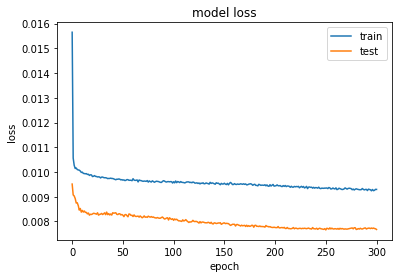

534/534 [==============================] - 2s 1ms/step
Test RMSE: 0.564
Epoch 1/400
274/274 - 6s - loss: 0.0143 - val_loss: 0.0091 - 6s/epoch - 22ms/step
Epoch 2/400
274/274 - 1s - loss: 0.0105 - val_loss: 0.0087 - 1s/epoch - 5ms/step
Epoch 3/400
274/274 - 1s - loss: 0.0103 - val_loss: 0.0088 - 1s/epoch - 4ms/step
Epoch 4/400
274/274 - 1s - loss: 0.0102 - val_loss: 0.0089 - 961ms/epoch - 4ms/step
Epoch 5/400
274/274 - 1s - loss: 0.0101 - val_loss: 0.0089 - 998ms/epoch - 4ms/step
Epoch 6/400
274/274 - 1s - loss: 0.0101 - val_loss: 0.0089 - 969ms/epoch - 4ms/step
Epoch 7/400
274/274 - 1s - loss: 0.0101 - val_loss: 0.0090 - 1s/epoch - 4ms/step
Epoch 8/400
274/274 - 1s - loss: 0.0100 - val_loss: 0.0088 - 934ms/epoch - 3ms/step
Epoch 9/400
274/274 - 1s - loss: 0.0100 - val_loss: 0.0087 - 1s/epoch - 4ms/step
Epoch 10/400
274/274 - 1s - loss: 0.0101 - val_loss: 0.0088 - 1s/epoch - 4ms/step
Epoch 11/400
274/274 - 1s - loss: 0.0099 - val_loss: 0.0087 - 1s/epoch - 5ms/step
Epoch 12/400
274/274 -

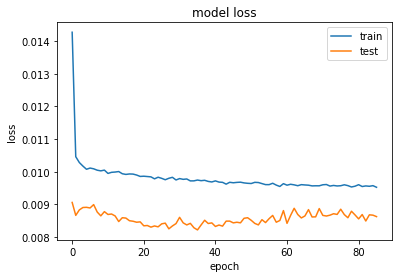

534/534 [==============================] - 1s 945us/step
Test RMSE: 0.598
Epoch 1/400
274/274 - 8s - loss: 0.0128 - val_loss: 0.0097 - 8s/epoch - 31ms/step
Epoch 2/400
274/274 - 4s - loss: 0.0104 - val_loss: 0.0097 - 4s/epoch - 16ms/step
Epoch 3/400
274/274 - 4s - loss: 0.0103 - val_loss: 0.0093 - 4s/epoch - 15ms/step
Epoch 4/400
274/274 - 5s - loss: 0.0101 - val_loss: 0.0090 - 5s/epoch - 17ms/step
Epoch 5/400
274/274 - 5s - loss: 0.0102 - val_loss: 0.0091 - 5s/epoch - 17ms/step
Epoch 6/400
274/274 - 5s - loss: 0.0102 - val_loss: 0.0091 - 5s/epoch - 17ms/step
Epoch 7/400
274/274 - 5s - loss: 0.0101 - val_loss: 0.0089 - 5s/epoch - 17ms/step
Epoch 8/400
274/274 - 4s - loss: 0.0101 - val_loss: 0.0090 - 4s/epoch - 16ms/step
Epoch 9/400
274/274 - 4s - loss: 0.0101 - val_loss: 0.0089 - 4s/epoch - 16ms/step
Epoch 10/400
274/274 - 4s - loss: 0.0101 - val_loss: 0.0089 - 4s/epoch - 16ms/step
Epoch 11/400
274/274 - 4s - loss: 0.0100 - val_loss: 0.0089 - 4s/epoch - 15ms/step
Epoch 12/400
274/274 -

Epoch 99/400
274/274 - 4s - loss: 0.0093 - val_loss: 0.0079 - 4s/epoch - 16ms/step
Epoch 100/400
274/274 - 4s - loss: 0.0093 - val_loss: 0.0079 - 4s/epoch - 16ms/step
Epoch 101/400
274/274 - 5s - loss: 0.0093 - val_loss: 0.0079 - 5s/epoch - 17ms/step
Epoch 102/400
274/274 - 4s - loss: 0.0093 - val_loss: 0.0080 - 4s/epoch - 16ms/step
Epoch 103/400
274/274 - 4s - loss: 0.0093 - val_loss: 0.0080 - 4s/epoch - 16ms/step
Epoch 104/400
274/274 - 4s - loss: 0.0093 - val_loss: 0.0079 - 4s/epoch - 15ms/step
Epoch 105/400
274/274 - 4s - loss: 0.0093 - val_loss: 0.0080 - 4s/epoch - 16ms/step
Epoch 106/400
274/274 - 5s - loss: 0.0093 - val_loss: 0.0080 - 5s/epoch - 17ms/step
Epoch 107/400
274/274 - 5s - loss: 0.0093 - val_loss: 0.0080 - 5s/epoch - 17ms/step
Epoch 108/400
274/274 - 4s - loss: 0.0093 - val_loss: 0.0080 - 4s/epoch - 16ms/step
Epoch 109/400
274/274 - 4s - loss: 0.0093 - val_loss: 0.0080 - 4s/epoch - 16ms/step
Epoch 110/400
274/274 - 4s - loss: 0.0092 - val_loss: 0.0080 - 4s/epoch - 16m

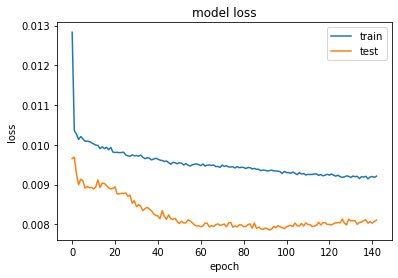

534/534 [==============================] - 3s 3ms/step
Test RMSE: 0.580


In [33]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
for model in models:
    batch_size = 64
    num_epoch = 400
    test_x = test_X
    test_Y = test_y
    # fit network
    history = model.fit(train_X, train_y, epochs=num_epoch, batch_size=batch_size, validation_data=(test_x, test_Y), verbose=2, shuffle=False, callbacks =[es])

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

    # make a prediction
    yhat = model.predict(test_X)
    test_x = test_x.reshape((test_x.shape[0], 7))
    # invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_x[:, -6:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_Y = test_Y.reshape((len(test_Y), 1))
    inv_y = np.concatenate((test_Y, test_x[:, -6:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)

###### Model simple_LSTM ==> 354 epoch, Test RMSE: 0.565
###### Model two_LSTM ==> 301 epoch, Test RMSE: 0.564
###### Model three_LSTM ==> 86 epoch, Test RMSE: 0.598
###### Model four_LSTM ==> 143  epoch, Test RMSE: 0.580

Model two_LSTM is providing minimun RMSE as compared to other models.